# TP TITANIC

### Librerias

In [312]:
import numpy as np
import pandas as pd
# Averigaur diferencias
import matplotlib as plt
import matplotlib.pyplot as plt
# Averigaur diferencias
import seaborn as sns
## Missing values
import missingno as msno
## Test chi cuadrado
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
## K means
from sklearn.cluster import KMeans
## Normalize data
from sklearn import preprocessing
## MCA
import prince
## PCA
from sklearn.decomposition import PCA

## Scale
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

### Importo dataset

In [168]:
df_raw=pd.read_csv("train.csv")

### Exploro dataset

In [169]:
df_raw.shape

(891, 12)

In [170]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
df_raw["Parch"].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [172]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


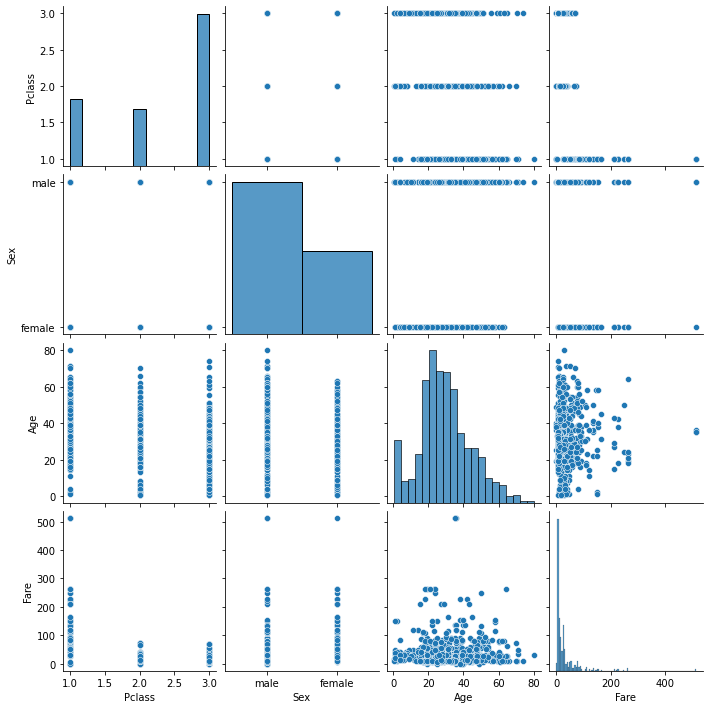

In [173]:
sns.pairplot(df_raw,vars=["Pclass","Sex","Age","Fare"],palette="plasma")
plt.show()

### Missing value plot

<AxesSubplot:>

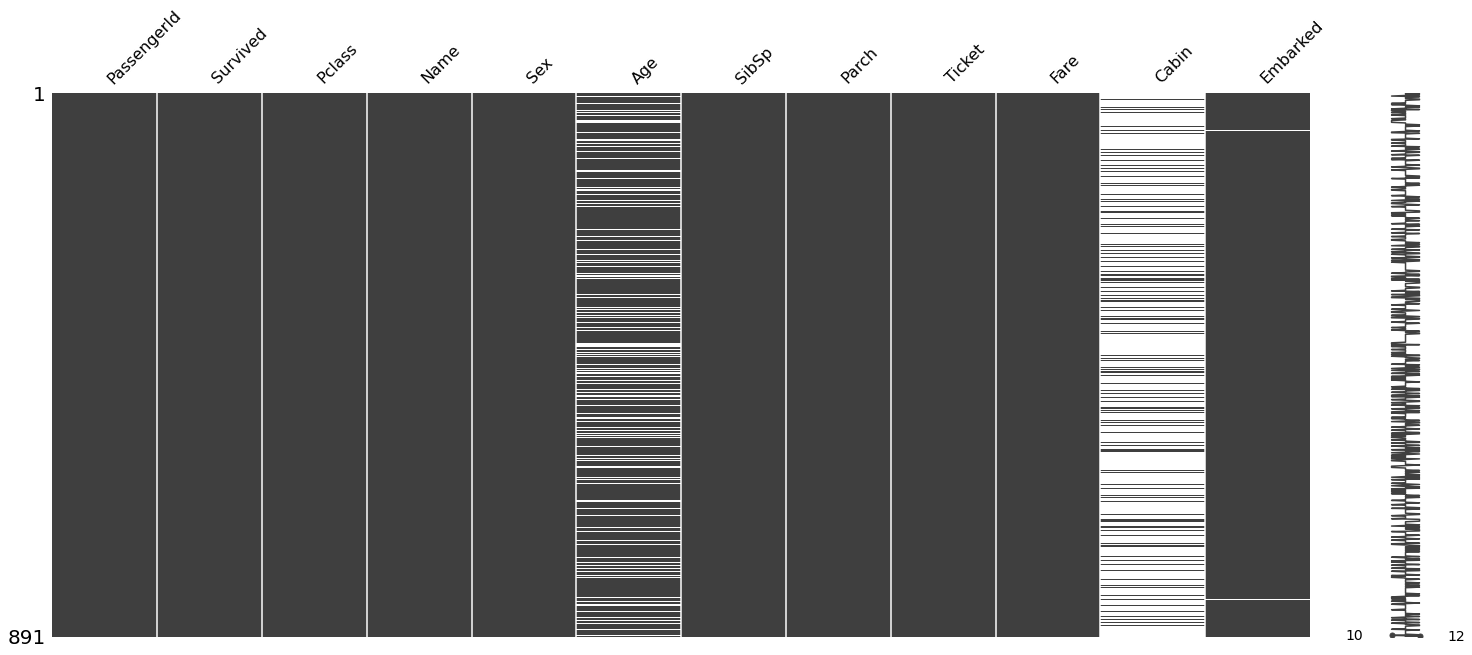

In [174]:
msno.matrix(df_raw)

### Test Chi Cuadrado

In [175]:
chi_pclass=pd.crosstab(df_raw["Sex"],df_raw["Survived"])
pclass_obs=chi_pclass.values
stat, p, dof, expected = chi2_contingency(pclass_obs)
print(p)

1.1973570627755645e-58


In [176]:
chi_pclass=pd.crosstab(df_raw["Cabin"],df_raw["Survived"])
pclass_obs=chi_pclass.values
stat, p, dof, expected = chi2_contingency(pclass_obs)
print(p)

0.18357354976388165


## K means 

#### Age vs Fare

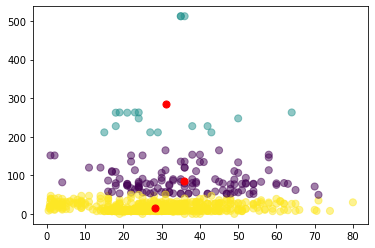

In [177]:
X=df_raw[["Age","Fare"]]
X=X.dropna()
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_

plt.scatter(X['Age'], X['Fare'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

#### Age vs Fare from [0,1]

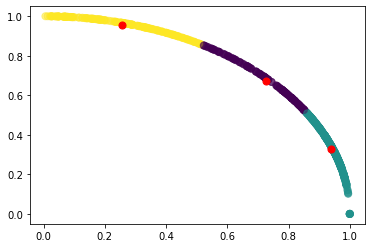

In [178]:
X=df_raw[["Age","Fare"]]
X=X.dropna()
Xnormalized = pd.DataFrame(preprocessing.normalize(X))
Xnormalized.columns = ["Age","Fare"]

kmeans = KMeans(n_clusters=3).fit(Xnormalized)
centroids = kmeans.cluster_centers_

plt.scatter(Xnormalized['Age'], Xnormalized['Fare'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


#### Age vs Fare Normalized

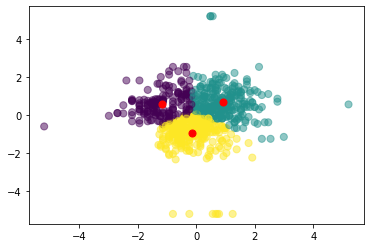

In [179]:
X=df_raw[["Age","Fare"]]
X=X.dropna()
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0,n_quantiles=714)
X_norm = pd.DataFrame(quantile_transformer.fit_transform(X))
X_norm.columns = ["Age","Fare"]

kmeans = KMeans(n_clusters=3).fit(X_norm)
centroids = kmeans.cluster_centers_

plt.scatter(X_norm['Age'], X_norm['Fare'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

#### Age vs Fare Standar Scalar

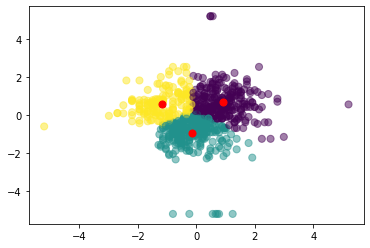

In [180]:
X=df_raw[["Age","Fare"]]
X=X.dropna()
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)



X_norm.columns = ["Age","Fare"]

kmeans = KMeans(n_clusters=3).fit(X_norm)
centroids = kmeans.cluster_centers_

plt.scatter(X_norm['Age'], X_norm['Fare'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [181]:
df_age_pred=pd.DataFrame()
df_age_pred=df_raw[["Age","Survived","Pclass","Sex","SibSp","Parch","Fare","Embarked"]]
df_age_pred=df_age_pred.dropna()
df_age_pred['Sex'].replace(["female","male"],[1,0],inplace=True)
df_age_pred['is.C'] = df_age_pred['Embarked'].apply(lambda x: 1 if x == "C" else 0)
df_age_pred['is.S'] = df_age_pred['Embarked'].apply(lambda x: 1 if x == "S" else 0)
df_age_pred.drop(["Embarked"], axis=1)

,Age,Survived,Pclass,Sex,SibSp,Parch,Fare,is.C,is.S
0,22.0,0,3,0,1,0,7.2500,0,1
1,38.0,1,1,1,1,0,71.2833,1,0
2,26.0,1,3,1,0,0,7.9250,0,1
3,35.0,1,1,1,1,0,53.1000,0,1
4,35.0,0,3,0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
885,39.0,0,3,1,0,5,29.1250,0,0
886,27.0,0,2,0,0,0,13.0000,0,1
887,19.0,1,1,1,0,0,30.0000,0,1
889,26.0,1,1,0,0,0,30.0000,1,0


### Mutltiple Correspondence Analysis

In [182]:
df_mca=pd.DataFrame()
df_mca=df_raw[["PassengerId","Fare","Age","Pclass","Sex","SibSp","Parch","Embarked","Survived"]]
df_mca["Pclass"]=df_mca["Pclass"].apply(str)
df_mca=df_mca.dropna()
df_mca=df_mca.drop(columns=['PassengerId',"Fare","Age","SibSp","Parch","Survived"])
df_mca

<ipython-input-182-e2f0c345a699>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mca["Pclass"]=df_mca["Pclass"].apply(str)


,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S
...,...,...,...
885,3,female,Q
886,2,male,S
887,1,female,S
889,1,male,C


In [183]:
mca = prince.MCA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=3,
    n_iter=10, random_state=None)
mca.fit(df_mca)

MCA(n_components=3)

In [184]:
mca.explained_inertia_

[0.27918780466062465, 0.22736470976315035, 0.2039953930322016]

In [185]:
mca.column_coordinates(df_mca)

,0,1,2
Pclass_1,1.318310,0.180562,-0.342342
Pclass_2,-0.293592,-1.403855,0.441291
Pclass_3,-0.540219,0.590545,-0.037613
Sex_female,0.570429,-0.368111,0.908907
Sex_male,-0.326140,0.210465,-0.519662
Embarked_C,1.618249,0.482566,-0.257752
Embarked_Q,-0.837872,2.786855,3.374402
Embarked_S,-0.337386,-0.254089,-0.110064


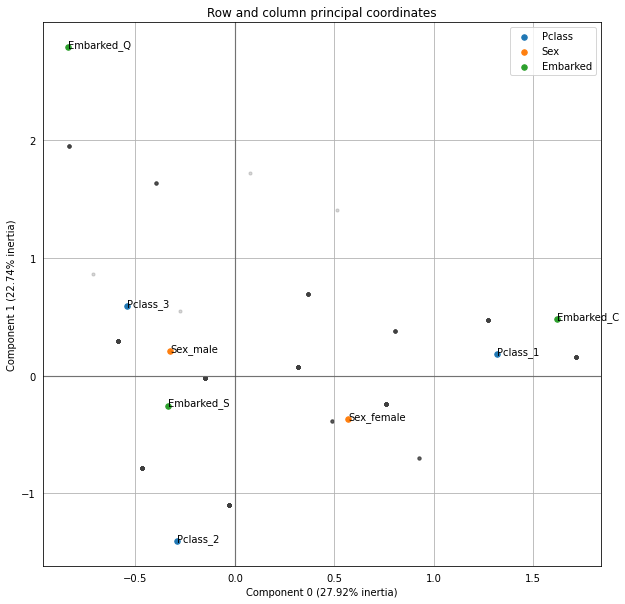

In [186]:
mca.plot_coordinates(df_mca,
                     row_points_alpha=.2,
                     figsize=(10, 10),
                     show_column_labels=True
                    )
plt.show()

In [187]:
pd.crosstab(df_mca["Pclass"],df_mca["Embarked"], normalize='index')

Embarked,C,Q,S
Pclass,,,
1,0.402174,0.010870,0.586957
2,0.086705,0.011561,0.901734
3,0.115493,0.067606,0.816901


In [188]:
mca.row_coordinates(df_mca)

,0,1,2
0,-0.588221,0.296154,-0.381496
1,1.713723,0.159750,0.176539
2,-0.150104,-0.017141,0.435171
3,0.758083,-0.239144,0.260967
4,-0.588221,0.296154,-0.381496
...,...,...,...
885,-0.394671,1.629509,2.427131
886,-0.467705,-0.783800,-0.107723
887,0.758083,-0.239144,0.260967
889,1.275606,0.473045,-0.640129


### Preparo el dataset para el PCA

In [196]:
df=pd.DataFrame()
df=df_raw[["PassengerId","Fare","Age","Pclass","Sex","SibSp","Parch","Embarked","Survived"]]
df=df.dropna()


df_pca=mca.row_coordinates(df_mca)
df_pca["fare"]=df["Fare"]
df_pca["Age"]=df["Age"]
df_pca["Survived"]=df["Survived"]
scaler=StandardScaler()
scaler.fit(df_pca.iloc[:,0:5])
X_scaled=pd.DataFrame(scaler.transform(df_pca.iloc[:,0:5]))

### Knn con 5 variables

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,df["Survived"])
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cv_results = cross_val_score(knn, X_scaled,df["Survived"], cv=5)
np.mean(cv_results)

0.776696542893726

### PCA

In [201]:
pca = PCA(n_components=5, svd_solver='full')
pca.fit(X_scaled)
X_scaled_pca=pd.DataFrame(pca.transform(X_scaled))
X_scaled_pca=pd.DataFrame(X_scaled_pca.iloc[:,0:3])

### KNN con las 3 variables del PCA

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,df["Survived"])
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
y_pred =knn.predict(X_test)
knn.score(X_test, y_test)
pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
cv_results = cross_val_score(knn, X_scaled,df["Survived"], cv=5)
np.mean(cv_results)

0.7753176401063726

### KNN sin ninguna transfomración

In [263]:
df_knn=df_raw[["PassengerId","Fare","Age","Pclass","Sex","SibSp","Parch","Embarked","Survived"]]
df_knn=df_knn.dropna()
df_knn=df_knn.drop(columns=['PassengerId',"SibSp","Parch"])
df_knn['Sex'].replace(["female","male"],[1,0],inplace=True)
df_knn['is.C'] = df_knn['Embarked'].apply(lambda x: 1 if x == "C" else 0)
df_knn['is.S'] = df_knn['Embarked'].apply(lambda x: 1 if x == "S" else 0)
df_knn=df_knn.drop(columns=["Embarked"])

In [322]:
X_train, X_test, y_train, y_test = train_test_split(df_knn.iloc[:,[1,2,3,5,6]],df_knn.iloc[:,4])
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
_pred =knn.predict(X_test)
knn.score(X_test, y_test)
pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
cv_results = cross_val_score(knn, df_knn.iloc[:,[1,2,3,5,6]], df_knn.iloc[:,4], cv=5)
np.mean(cv_results)

0.7373978134541515

In [288]:
df_knn

,Fare,Age,Pclass,Sex,Survived,is.C,is.S
0,7.2500,22.0,3,0,0,0,1
1,71.2833,38.0,1,1,1,1,0
2,7.9250,26.0,3,1,1,0,1
3,53.1000,35.0,1,1,1,0,1
4,8.0500,35.0,3,0,0,0,1
...,...,...,...,...,...,...,...
885,29.1250,39.0,3,1,0,0,0
886,13.0000,27.0,2,0,0,0,1
887,30.0000,19.0,1,1,1,0,1
889,30.0000,26.0,1,0,1,1,0


In [289]:
pca2 = PCA(n_components=7, svd_solver='full')
pca2.fit(df_knn)

PCA(n_components=7, svd_solver='full')

In [307]:
age=df_raw[df_raw["Age"].isna()]